In [1]:
# importing libraries
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [1]:
# checking available devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16792068954018858914
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16808218779057302960
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
# splitting dataset
# loading dataset
from keras.datasets import mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


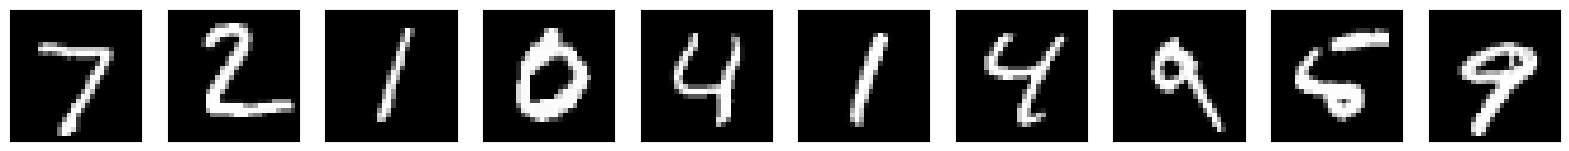

In [3]:
import matplotlib.pyplot as plt
# display the dataset
n = 10

# create a figure  to display the image
plt.figure(figsize=(20 ,4))

# loop through the first "n" images

for i in range(n):
    # create a subplot within the figure
    ax = plt.subplot(2 , n , i+1)
    # display the original image
    plt.imshow(x_test[i].reshape(28 , 28 ))
     # set cmap to grayscale
    plt.gray()
    # hide x and y axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

plt.close()




In [4]:
# shapes of dataset
print("shape of x_train :" , x_train.shape)
print("shape of y_tain :" , y_train.shape)
print("shape of x_test :" , x_test.shape)
print("shape of y_test :" , y_test.shape)

shape of x_train : (60000, 28, 28)
shape of y_tain : (60000,)
shape of x_test : (10000, 28, 28)
shape of y_test : (10000,)


In [5]:
# reshape the data
x_train = x_train.reshape( x_train.shape[0] , 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1)

In [6]:
# reshape the data
x_train = x_train.reshape( x_train.shape[0] , 28 , 28 , 1)
x_test = x_test.reshape(x_test.shape[0] , 28 , 28 , 1)

In [7]:
# min max scalling
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [8]:
# one hot encoding

from keras.utils import to_categorical

y_train = to_categorical(y_train , num_classes = 10)
y_test = to_categorical(y_test , num_classes = 10 )

# seeing updated shapes
print("x_train shape: " , x_train.shape)
print("y_train shape: " , y_train.shape)
print("x_test shape: " , x_test.shape)
print("y_test shape:" , y_test.shape)

x_train shape:  (60000, 28, 28, 1)
y_train shape:  (60000, 10)
x_test shape:  (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [10]:
# building CNN
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D  # Corrected capitalization


In [15]:
# Image_rows , image_cols , channels = 28 , 28 , 1   # 1 for greyscale images and 3 for rgb images

# filters = [ 6 , 80 , 32 , 120 ]

# classes = 10

# define the dimensions of the input image
img_rows , img_cols , channels = 28 , 28 , 1  # 1 for greyscale images and 3 for rgb images

# define the num of filters for each layers of the CNN

filters = [6 , 80 , 32 , 120]   # theses are the num of filters  in each CNN  layer

# define the num of classes for classification
classes = 10  # this is the num of different categories that  CNN will classify




In [29]:
# Creating Model

model=Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 80)        2000      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 80)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 32)          10272     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 3, 3, 32)        

In [33]:
# training model
model.fit(x_train , y_train , validation_split = 0.2  , batch_size = 64 , verbose = 1 )
# model.evaluate(x_test, y_test, verbose=2)

750/750 [==============================] - 6s 8ms/step - loss: 0.3050 - accuracy: 0.9020 - val_loss: 0.2080 - val_accuracy: 0.9351


In [35]:
# testing the model
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
y_pred_probs = model.predict(x_test , verbose = 0 )
y_pred = np.where(y_pred_probs > 0.5 , 1 , 0 )

# calculating accuracy score for the model

accuracy_score  = accuracy_score(y_pred , y_test )
print("test_accuracy/ accurracy_score is {}: ".format(accuracy_score ))

test_accuracy/ accurracy_score is 0.9223: 


In [37]:
# define  a mask for selecting a range of indices (20 to 49 )
mask = range(20 , 50 )

x_valid = x_test[20:40]
actual_labels = y_test[20 :40]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 215ms/step


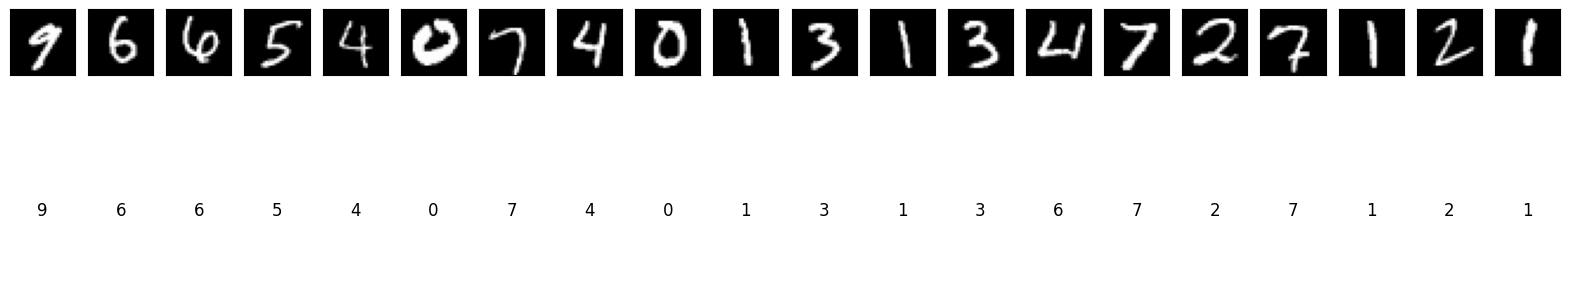

In [41]:
# Set up a figure to display images
n = len(x_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
